# Data Exploration

### Investigate how many houses getting sale per sale date

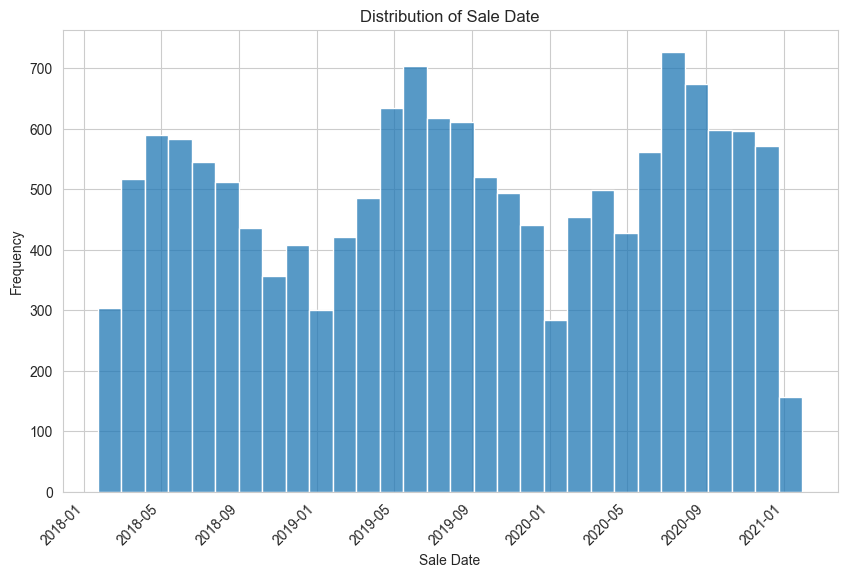

In [75]:
viridis_color = sns.color_palette("viridis", n_colors=1)[0]

plt.figure(figsize=(10, 6))
sns.histplot(df_2['latest_saledate'], bins=30, kde=False)
plt.title('Distribution of Sale Date')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sale Date')
plt.ylabel('Frequency')
plt.show()

**Key Takeaway**: From the histogram above, we can see that there might be a trend in number of house sale, it peaks at the end of Spring and early summer (around May and June). However, the trend changed in 2020, mostly due to COVID-19 that affect the demand. 

## Data types and validity

In [76]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15020 entries, 0 to 15019
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   latitude                    15020 non-null  float64       
 1   longitude                   15020 non-null  float64       
 2   propertyTaxRate             15020 non-null  float64       
 3   garageSpaces                15020 non-null  int64         
 4   hasAssociation              15020 non-null  bool          
 5   hasCooling                  15020 non-null  bool          
 6   hasGarage                   15020 non-null  bool          
 7   hasHeating                  15020 non-null  bool          
 8   hasSpa                      15020 non-null  bool          
 9   hasView                     15020 non-null  bool          
 10  homeType                    15020 non-null  object        
 11  parkingSpaces               15020 non-null  int64     

In [77]:
df_2.describe()

,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,...,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Income,population,density,MORTGAGE30US,MEDLISPRIPERSQUFEE12420
count,"15,020","15,020","15,020","15,020","15,020","15,020","15,020","15,020",15020,"15,020",...,"15,020","15,020","15,020","15,020","15,020","15,020","15,020","15,020","15,020","15,020"
mean,30,-98,2,1,1,"1,988","514,785",3,2019-08-06 13:36:55.605858816,31,...,"1,236",15,3,3,1,"112,815","34,502","1,313",4,175
min,30,-98,2,0,0,"1,905","5,500",1,2018-01-22 00:00:00,1,...,396,10,0,0,1,"30,336",638,30,3,163
25%,30,-98,2,0,0,"1,974","310,000",1,2018-11-01 00:00:00,20,...,966,14,2,3,1,"86,456","22,484",695,3,165
50%,30,-98,2,1,1,"1,993","409,000",2,2019-08-01 00:00:00,29,...,"1,287",15,3,3,1,"102,886","30,894","1,393",4,167
75%,30,-98,2,2,2,"2,006","575,000",4,2020-05-28 00:00:00,39,...,"1,494",16,3,4,2,"123,722","50,479","1,897",4,176
max,31,-98,2,22,22,"2,020","13,500,000",23,2021-01-30 00:00:00,179,...,"1,913",19,27,20,4,"222,552","61,122","6,143",5,226
std,0,0,0,1,1,22,"454,373",2,NaN,21,...,327,2,1,1,1,"40,297","15,307",722,1,16


There are some houses that get build from 1905, which is really early, and looking at the price, we can see that it is right skewed with the max is far more on the right. However, that might be normal in the housing market since there are different supply and demand. <br>
The price distribution is highly right skewed. At 75t%, the price is 575,000, while the maximum price is nearly tripled, at 13,500,000 USD. Since the outliers dominate the scale, the log value will be considered to plot the price distribution. <br>
We suspect that the expensive houses would have a large number of lot size square feet since the maximum of lot size square feet is also far from the 3rd quartile. 

#### Price distribution in log scale

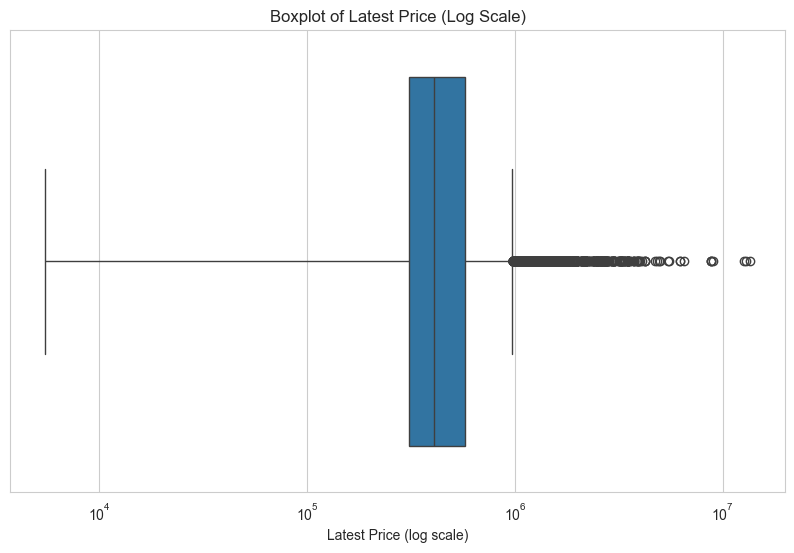

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_2['latestPrice'])
plt.xscale('log')
plt.title("Boxplot of Latest Price (Log Scale)")
plt.xlabel("Latest Price (log scale)")
plt.show()


There is a heavily right-skewed distribution of home prices. Most listings fall between roughly ten thousands to one hundred thousands USD. A smaller substantial group extends into the 10<sup>5</sup> and 10<sup>6</sup> which indicates mid-range to higher-end properties. Beyond that, a thin tail continues at around 10<sup>7</sup>, reflecting a limited but notable set of very expensive houses.

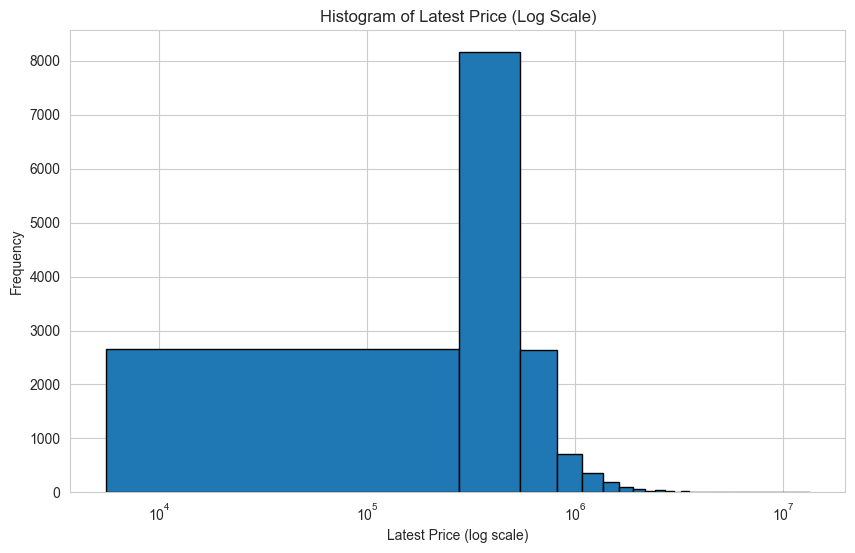

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df_2['latestPrice'], bins=50, edgecolor='k')
plt.xscale('log')
plt.title("Histogram of Latest Price (Log Scale)")
plt.xlabel("Latest Price (log scale)")
plt.ylabel("Frequency")
plt.show()


Overall, the distribution suggests a concentration of mid-range listings, most house prices lie between the mid to high hundreds of thousands that forms a pronounced peak. A smaller subset extends to the multi-million dollar range, indicate a premium segment.

### Checking how many home type

In [42]:
df['homeType'].value_counts()

homeType
Single Family            14096
Condo                      467
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 81
Residential                 37
Apartment                   36
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: count, dtype: int64

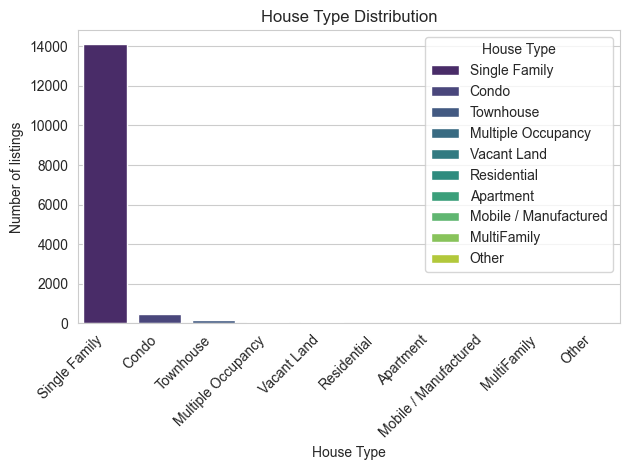

In [90]:
sns.barplot(x=df_2['homeType'].value_counts().index, y=df_2['homeType'].value_counts().values, palette='viridis', hue=df_2['homeType'].value_counts().index, legend = True)
plt.legend(title="House Type")
plt.xticks(rotation=45, ha='right')
plt.xlabel('House Type')
plt.ylabel('Number of listings')
plt.title('House Type Distribution')
plt.tight_layout()
plt.show()

There are huge discrepancy in the home type distribution, most of the listings are Single Family type which suggests that the dataset is heavily skewed toward single-family properties.

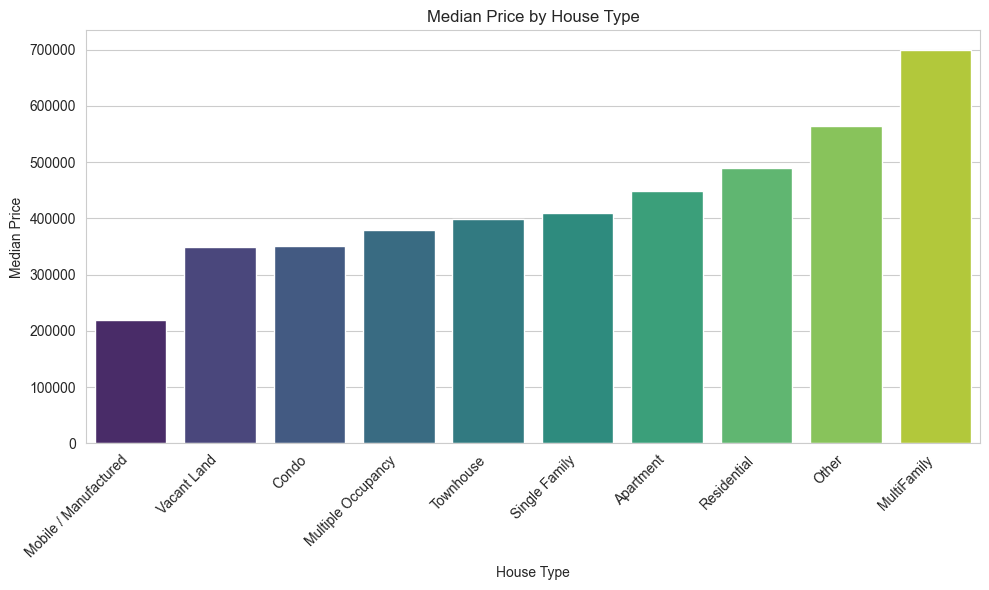

In [91]:
median_price = df_2.groupby('homeType')['latestPrice'].median().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=median_price.index, y=median_price.values, hue=mean_price.index,
            legend=False, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Median Price by House Type")
plt.xlabel("House Type")
plt.ylabel("Median Price")
plt.tight_layout()
plt.show()

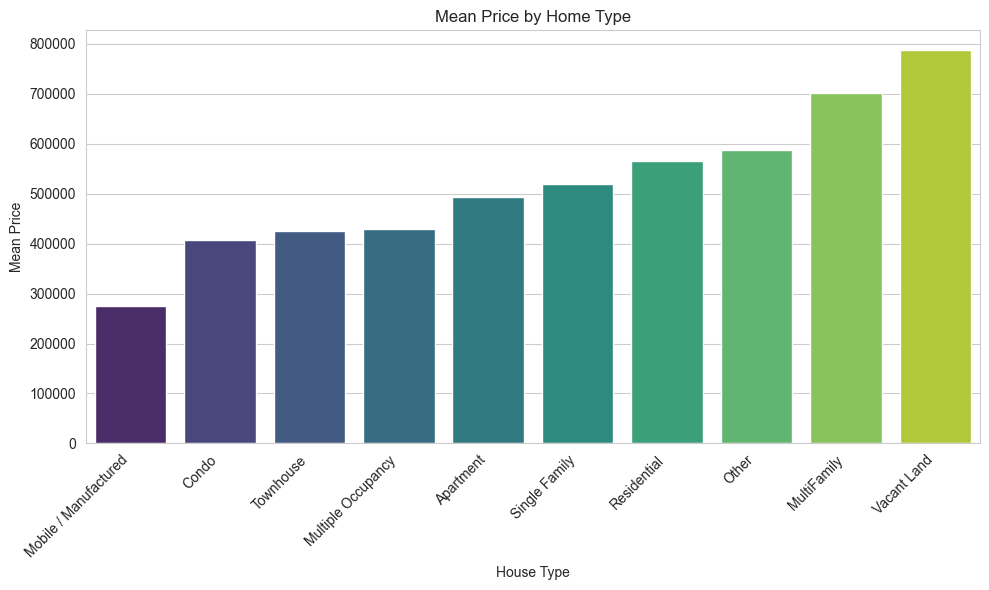

In [130]:
mean_price = df_2.groupby('homeType')['latestPrice'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price.index, y=mean_price.values, hue=mean_price.index,
            legend=False, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Mean Price by Home Type")
plt.xlabel("House Type")
plt.ylabel("Mean Price")
plt.tight_layout()
plt.show()


By comparing the mean and median of price per house type, we can see that mobile/manufactured houses and condos appear consistently at the lower range, suggest that these categories are generally more affordable with few outliers driving price upward. On the other hand, multi-family properties rank among the highest for both mean and median, suggest a reliably higher price range.

Interestingly, while vacant land has the highest mean price but relatively moderate median. This discrepancy suggest the effect of outliers in the listings.

The other categories form a mid-range cluster in both metrics with position shift slightly. 

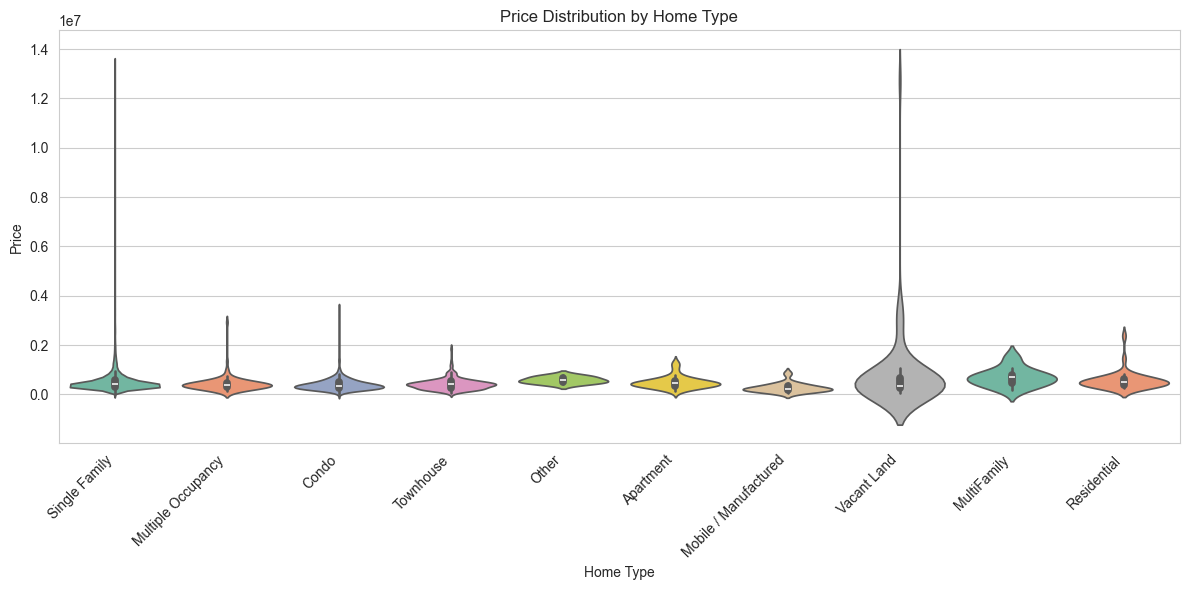

In [93]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='homeType', y='latestPrice', data=df_2, hue='homeType', legend=False, palette='Set2')
plt.xticks(rotation=45, ha='right')  # Rotate labels if needed
plt.title("Price Distribution by Home Type")
plt.xlabel("Home Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In order for the violin plot to be visible we decided to omit the extremely expensive listings since they were skewing the result. This operation was only performed locally to present the plot.

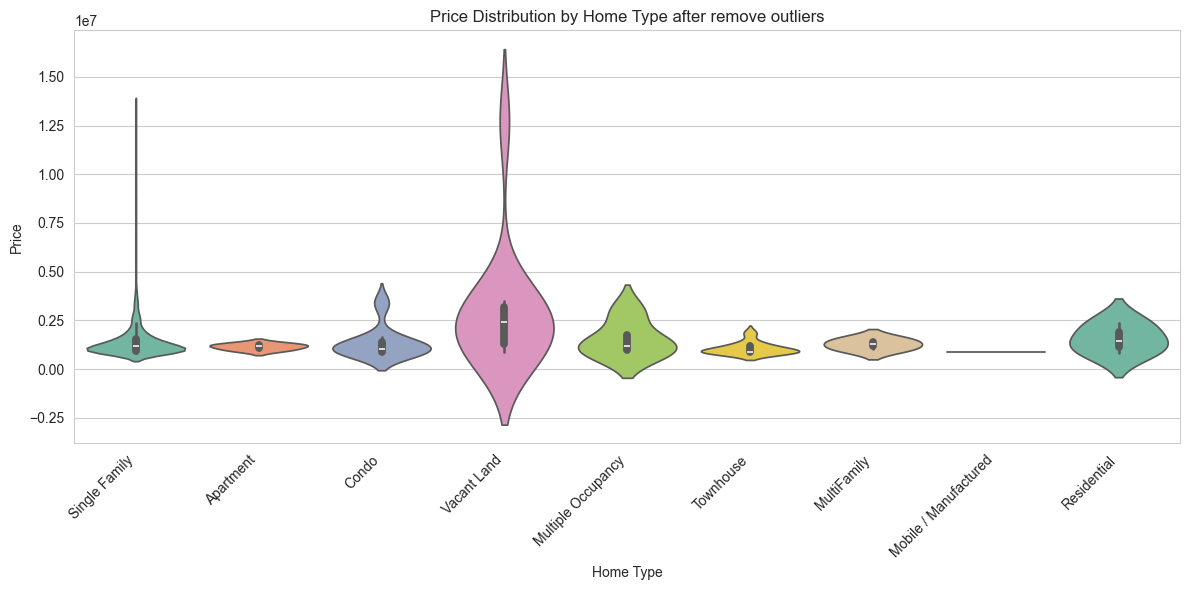

In [95]:
new_threshold = df_2['latestPrice'].quantile(0.90)
df_filtered = df_2[df_2['latestPrice'] > new_threshold]

plt.figure(figsize=(12, 6))
sns.violinplot(x='homeType', y='latestPrice', data=df_filtered, hue='homeType', legend=False, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution by Home Type after remove outliers")
plt.xlabel("Home Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


While removing 10% of extreme value, the vertical sale compresses significantly for most categories, reveal more detailed shaped and medians. House types like townhouse of apartment have relatively compact distributions and medians at moderate price. However, as expected, even after removing 5% extreme value, the very high-priced properties still influence vacant land's distribution more than most other types.

***Home type imbalance handle:***  Since Single Family type appears more than 90% in the dataset, we decide to keep only Single Family home type for further development

In [102]:
df_3 = df_2[df_2['homeType'] == 'Single Family']
df_3.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,Income,population,density,MORTGAGE30US,MEDLISPRIPERSQUFEE12420
0,30,-98,2,0,False,True,False,True,False,False,...,794,12,2,3,1,"78,474","51,069",872,4,163
1,30,-98,2,2,True,True,True,True,False,False,...,1057,14,3,3,2,"78,474","51,069",872,4,163
2,30,-98,2,0,True,True,False,True,False,False,...,743,15,3,4,1,"164,066","26,413",280,4,163
3,30,-98,2,0,True,True,False,True,False,False,...,1632,16,3,4,1,"123,722","29,322",960,4,163
4,30,-98,2,1,False,True,True,True,False,False,...,679,14,3,3,2,"101,304","26,495","2,044",4,163


***From now on, we will be investigate only Single Family housing price***

In [ ]:
#df_map is a copy of df_2 for the purpose of plotting 
df_map = df_3.copy()

Information from sale date will be extract monthly to see the price trend over 3 years period

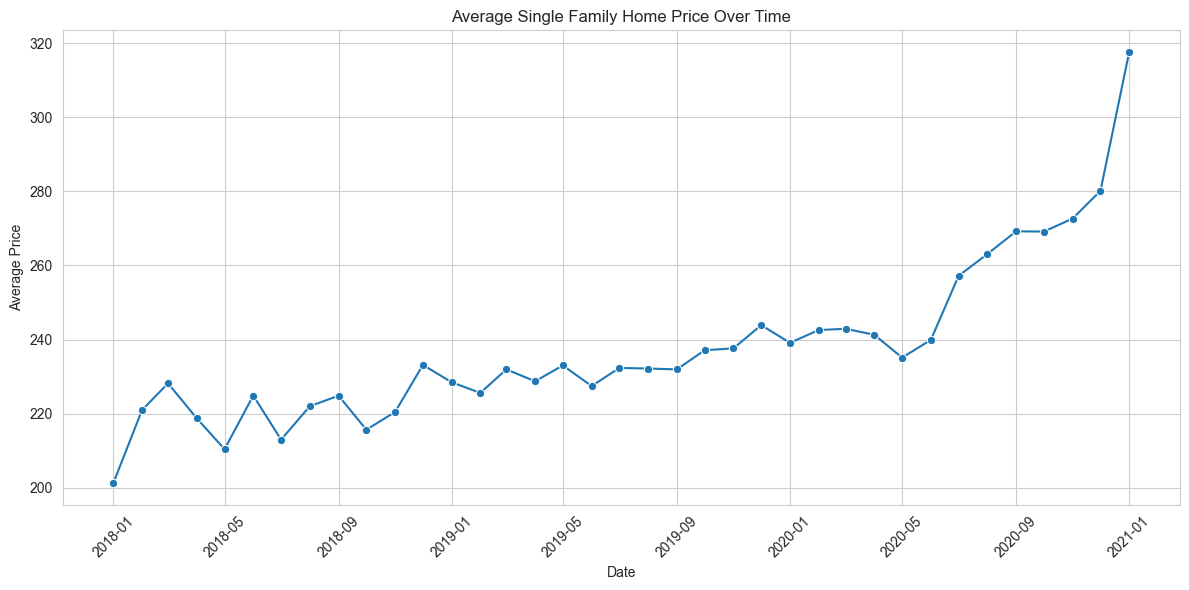

In [131]:
df_map['latest_saledate'] = pd.to_datetime(df_map['latest_saledate'], errors='coerce')
df_map['year'] = df_map['latest_saledate'].dt.year
df_map['month'] = df_map['latest_saledate'].dt.month
df_map['day_of_week'] = df_map['latest_saledate'].dt.dayofweek
df_map['quarter'] = df_map['latest_saledate'].dt.quarter

df_by_month = df_map.groupby(df_map['latest_saledate'].dt.month)['price_per_sqft'].mean()
df_by_month.index.name = 'month'
df_by_month = df_by_month.reset_index(name='avg_price')

df_monthly = df_map.groupby([
    df_map['latest_saledate'].dt.year.rename('year'),
    df_map['latest_saledate'].dt.month.rename('month')
])['price_per_sqft'].mean().reset_index()

df_monthly.columns = ['year', 'month', 'avg_price']
df_monthly['date'] = pd.to_datetime(df_monthly[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='date', y='avg_price', marker='o')
plt.title("Average Single Family Home Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In general, there was an upward trend in average house pricing from 2018 to 2021. The chart shows the average price per square foot that rise steadily from around $190 - $200 in early 2018 to over $300 by early 2021. The monthly fluctuation does occur but there was a more accelerated increase in late 2020 to 2021.

Over 3 years period, the market became increasingly expensive on a per-square-foot basis, that might signal a new trend in housing price which reflect heightened demand, constrained supply, or broader economic factors driving up houses values.

## Correlation and features relation

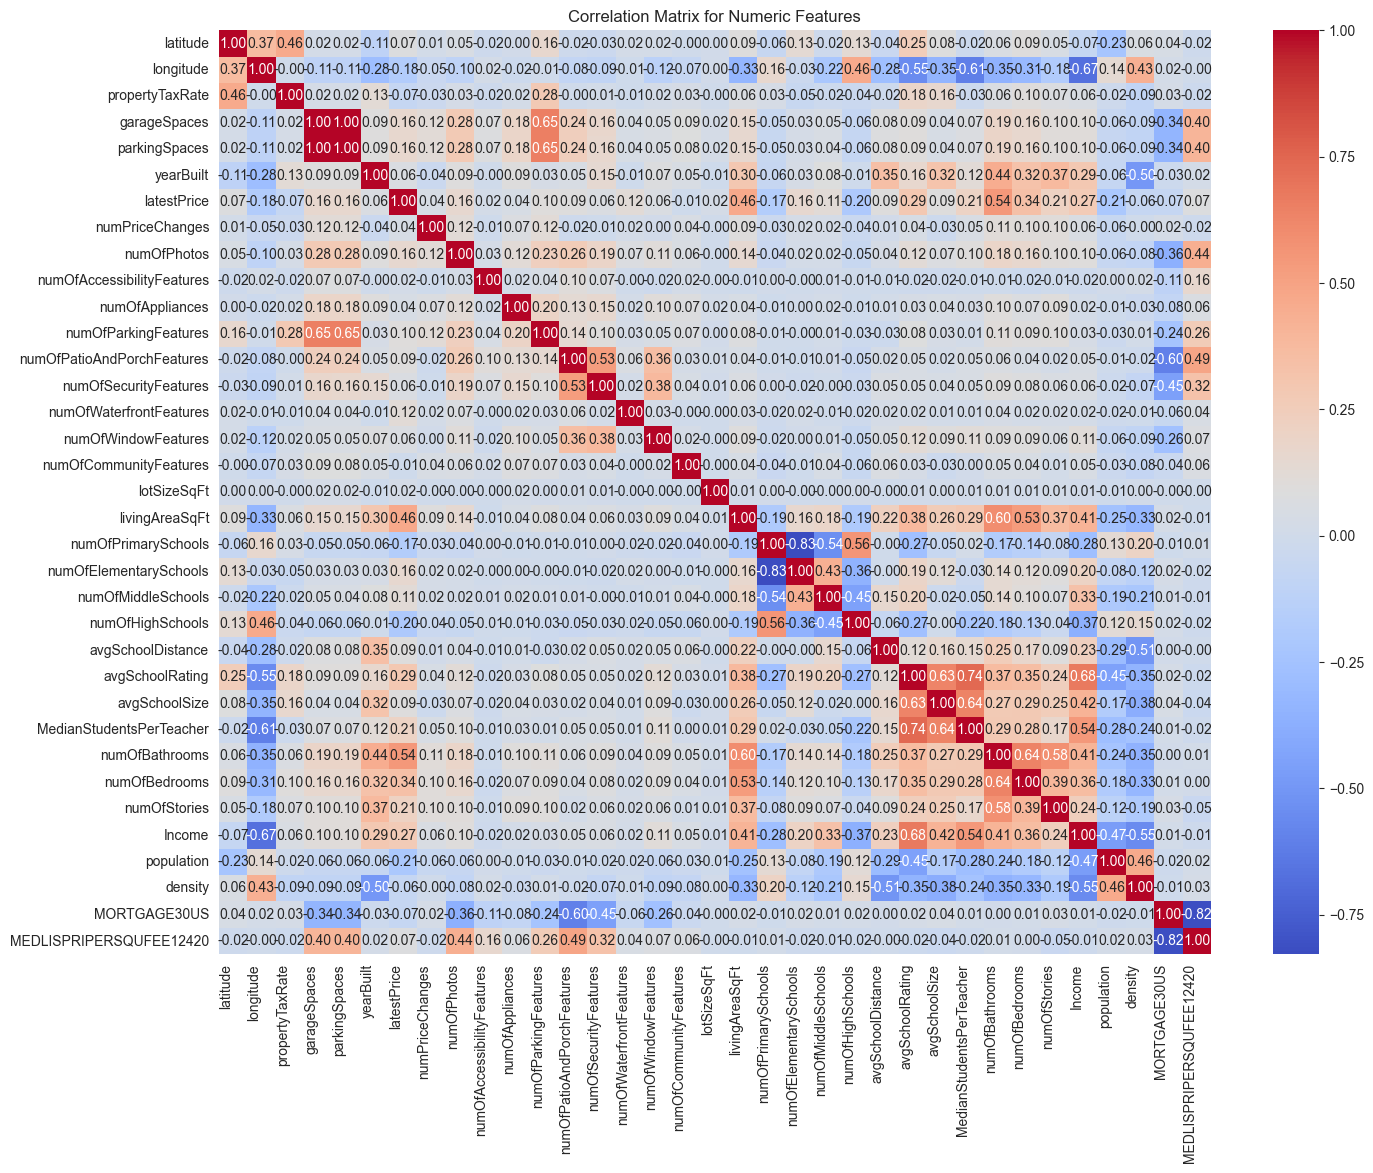

In [108]:
#Correlation matrix plot
numeric_df = df_3.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

Looking at the correlation with the price variable, it is highly correlated with the size of the house (average living square feet). Interestingly, the number of bathrooms also has a positive relation with the price of the house, which mean that if a house has more bathroom, the sales price will tend to be higher. Similarly, the number of bedroom also has positive impact on houses price.

Another factor that also has significant impact on housing price is the school rating which is a factor that worth consideration when purchase a house, especially for families which has children.

***Strong correlation:*** <br>
Price feature: There is strong relation between price and the living area square feet, number of bedrooms and number of bathroom, number of stories, indicate that larger homes tend to have more stories and the price is higher. <br>
School feature: avgSchoolDistance, avgSchoolRating, avgSchoolSize, and MedianStudentsPerTeacher has a positive correlation which may cluster. Better school are more likely to be located in high income area, and home that locates near good school would have higher price compare to those that far away. 

***Medium correlation:*** <br>
Income vs Price: A noticable relation between income and house price appears, which is a common real-estate phenomenon where higher-income tend to command higher home prices. <br>
Year build and living area: A medium relation appears here, suggests that newer homes have more bathrooms/bedrooms on average, and also larger living area. 

***No correlation:*** <br>
Luxury features: Spa, Waterfront, Community, Appliances has relatively low or near-zero correlation suggests that having these features doesn’t consistently affect the numeric metrics (house price) in a linear fashion.

***Negative correlation:*** <br>
Mortgage rate and median list price per square feet has a strong negative relation. They are macroeconomonic factors which does not really reflect individual decision. When mortgage rates are historically low, borrowing is cheaper, buyer demand often increases, and home prices can rise significantly. On the other hand, when rates climb, monthly payments become more expensive, demand cools, and sellers may adjust listing prices downward. 

#### How each feature affect price

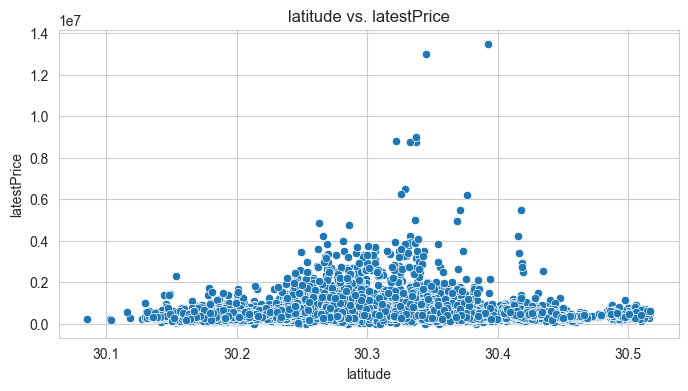

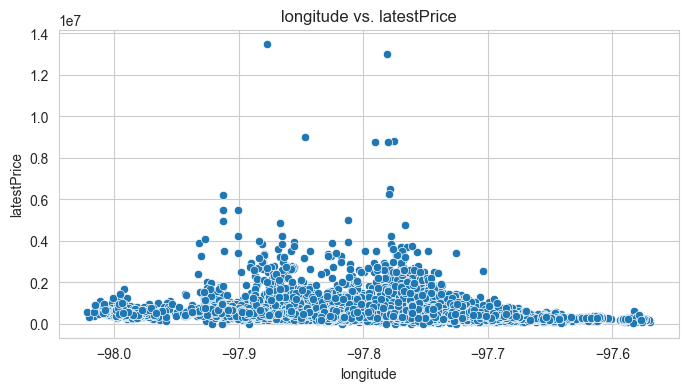

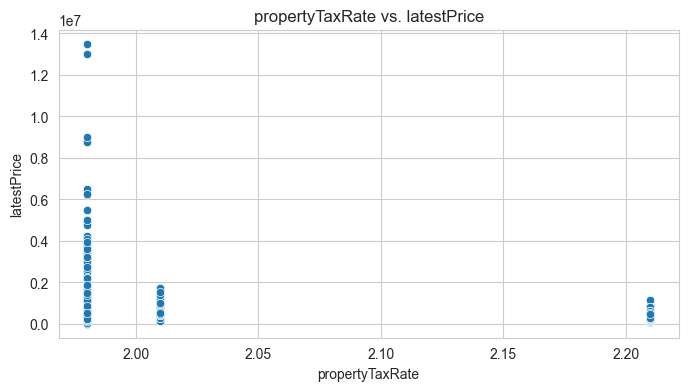

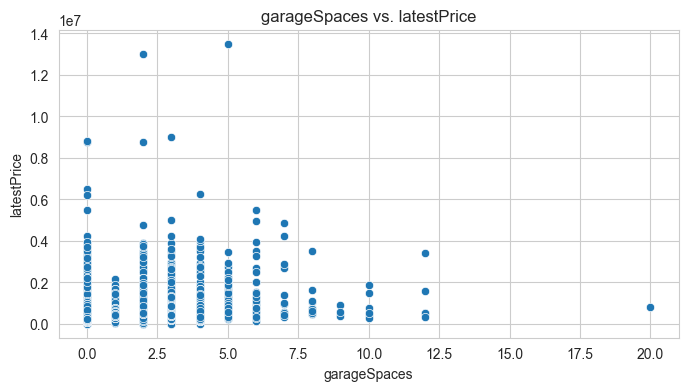

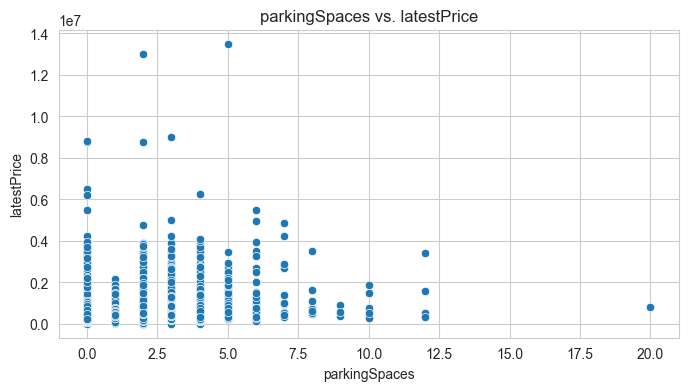

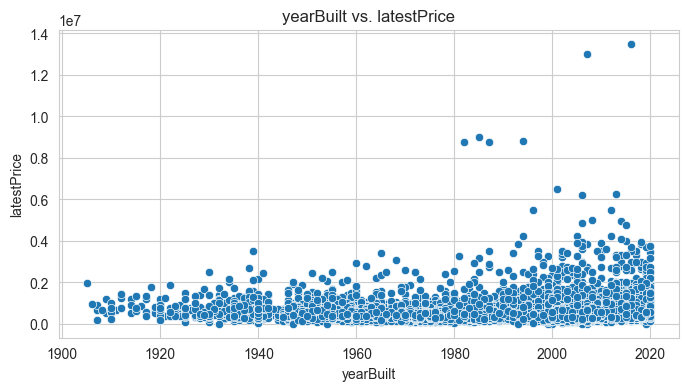

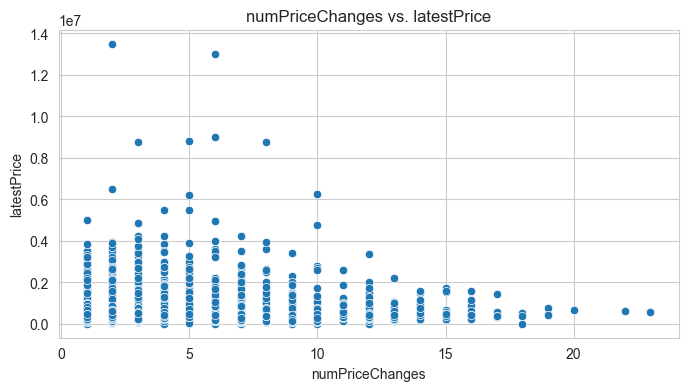

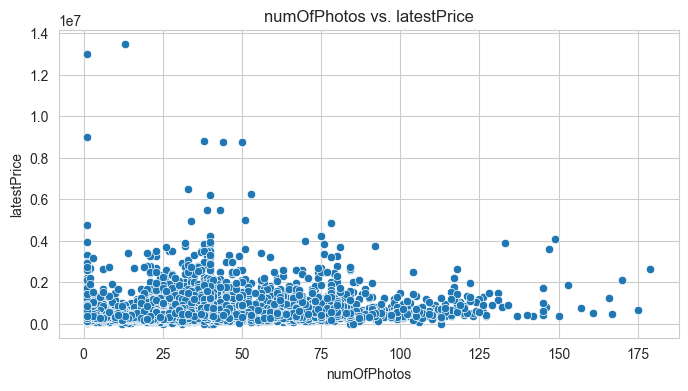

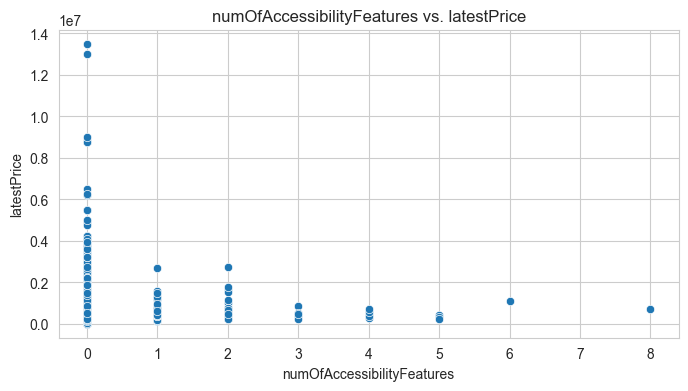

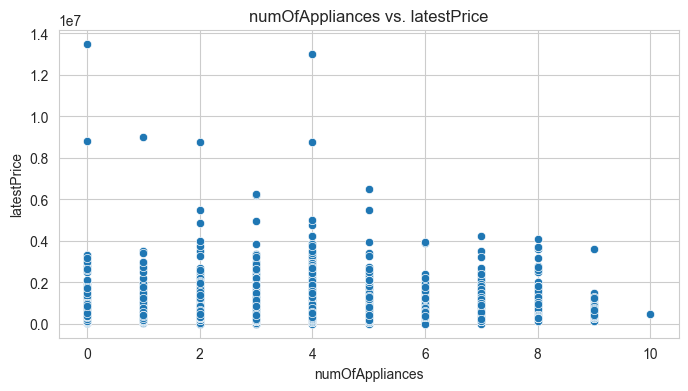

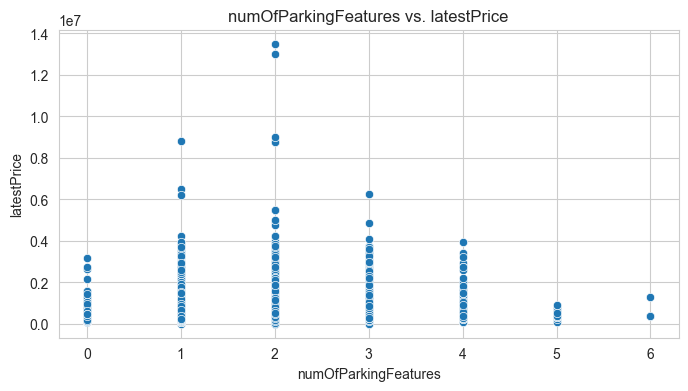

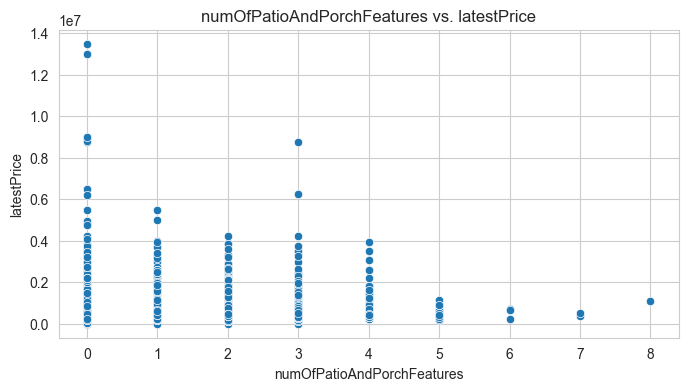

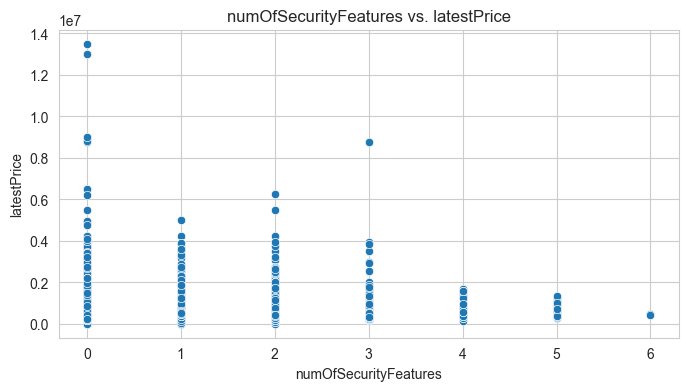

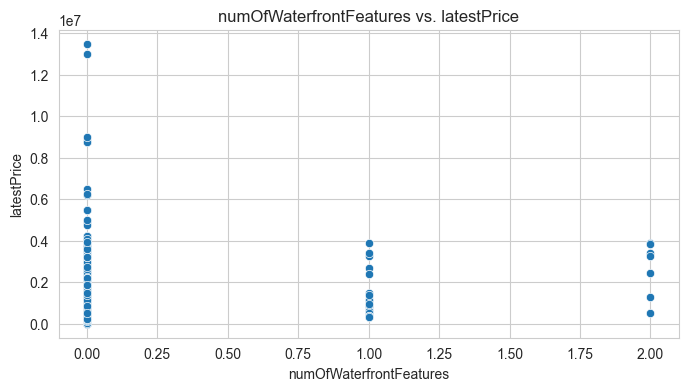

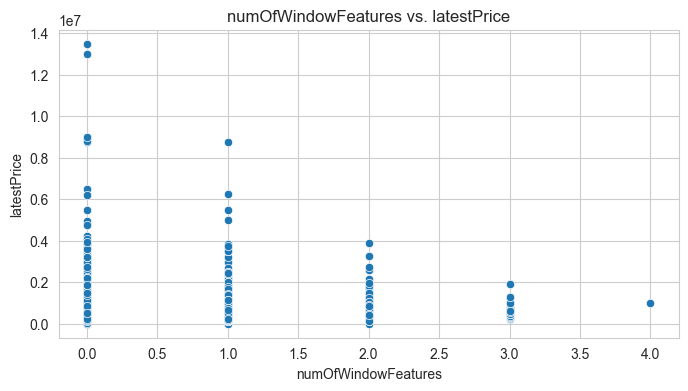

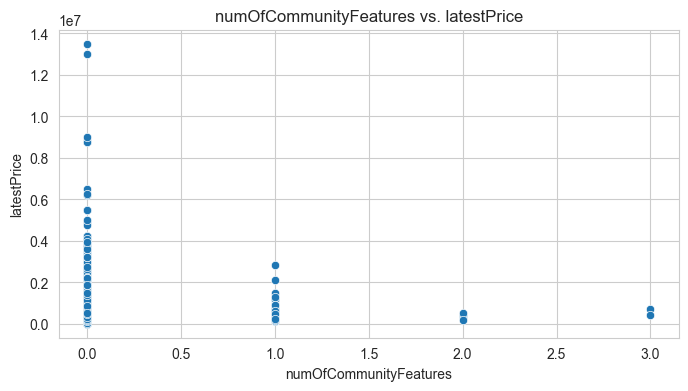

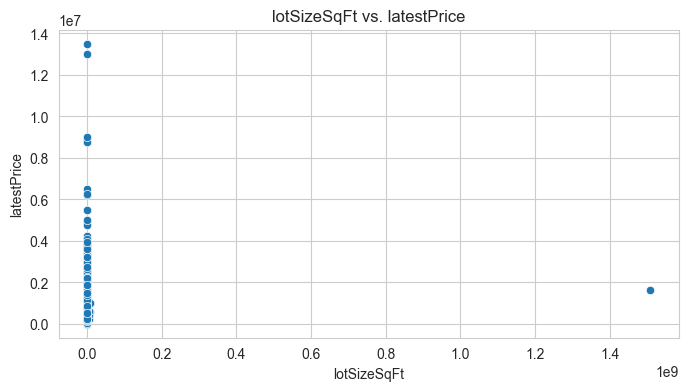

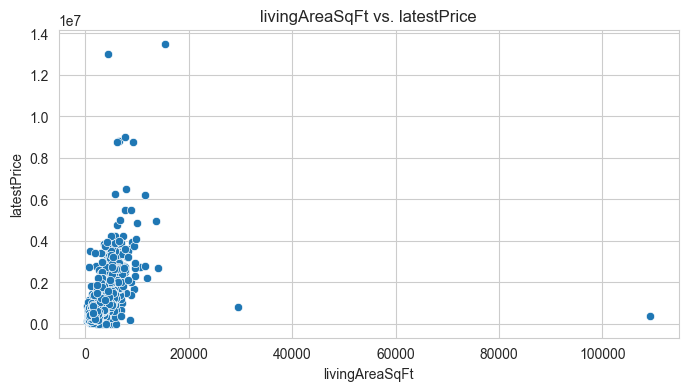

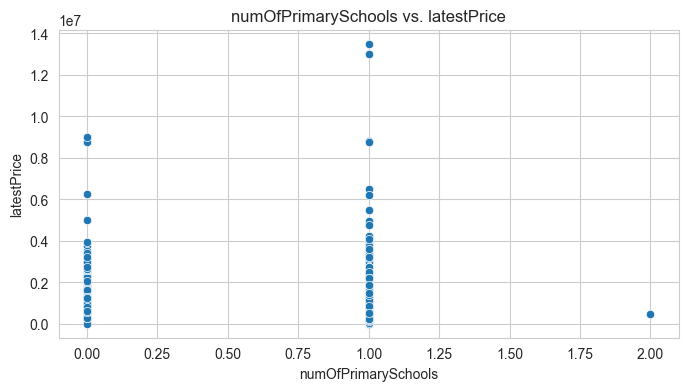

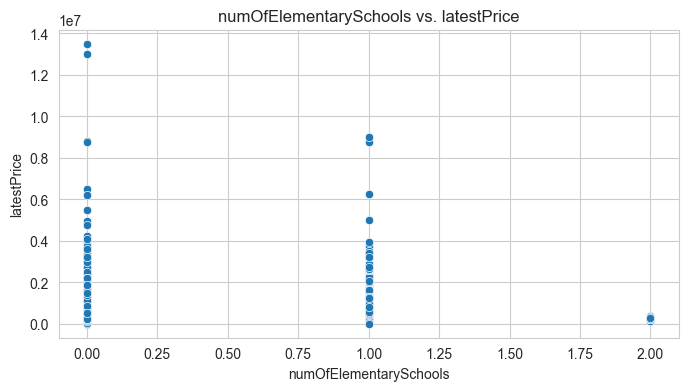

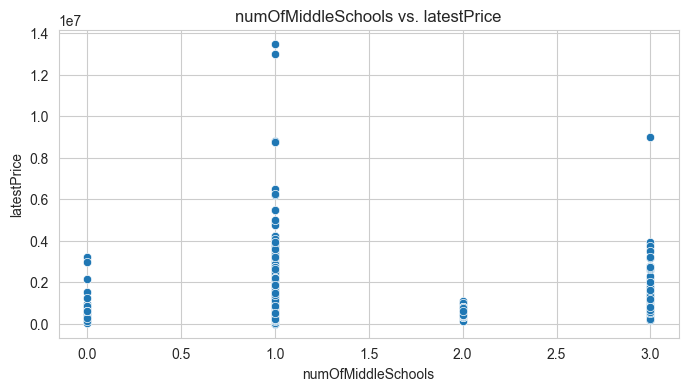

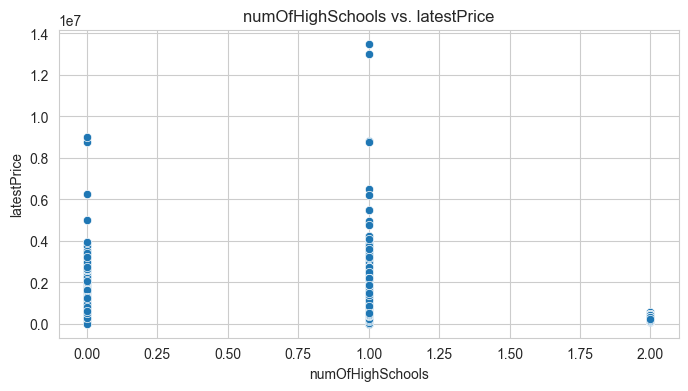

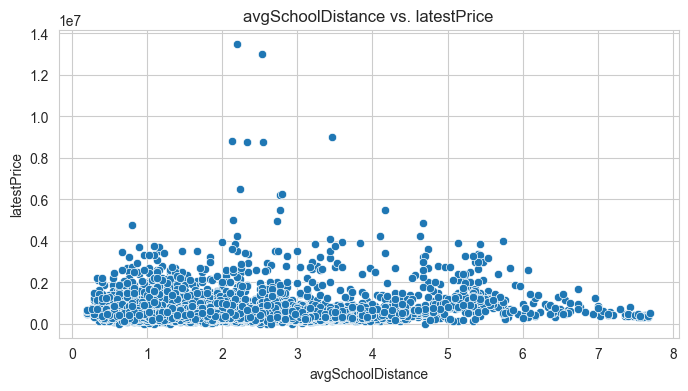

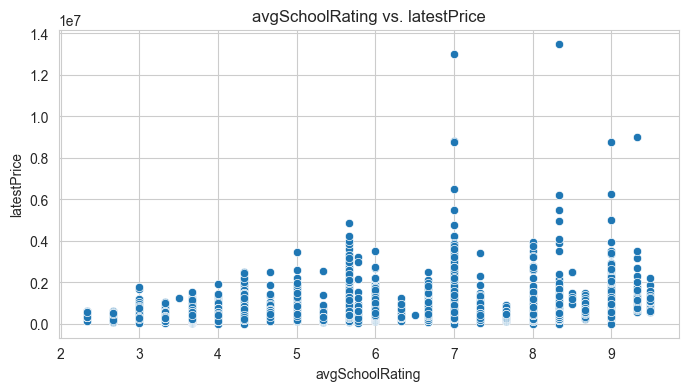

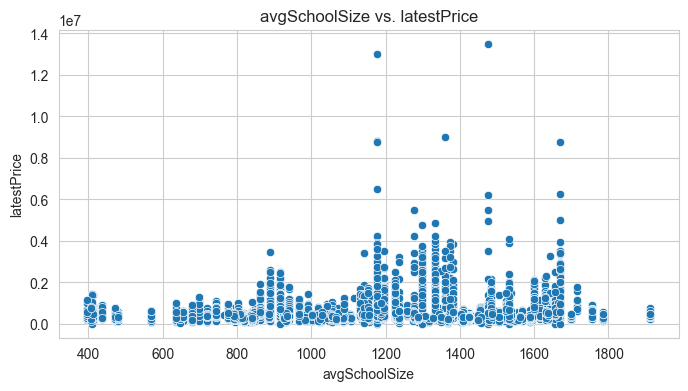

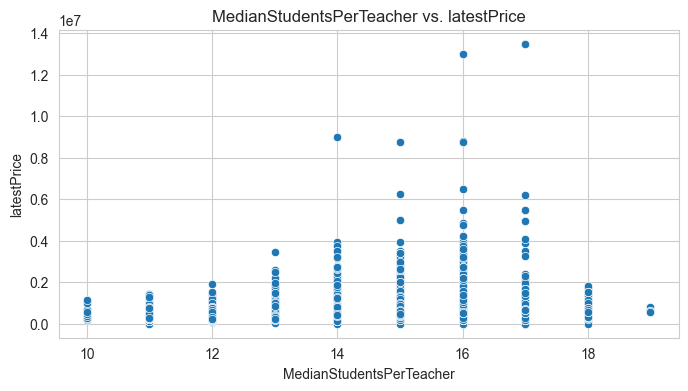

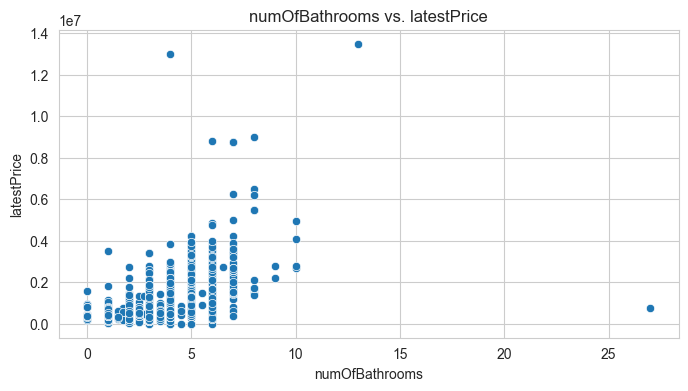

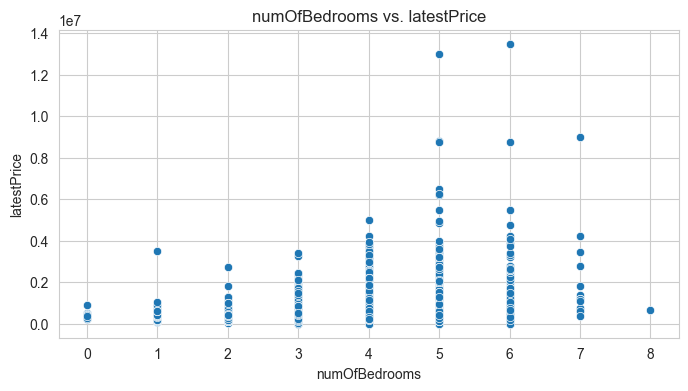

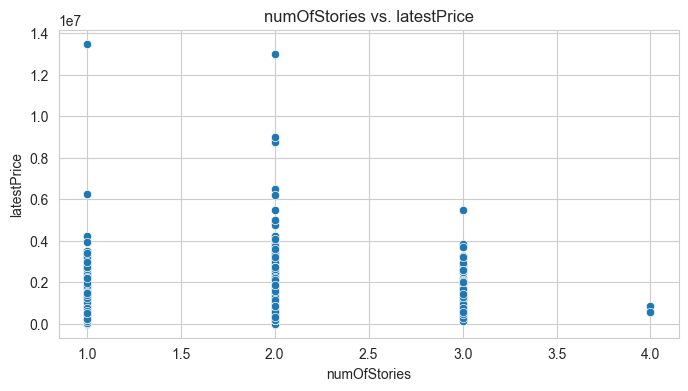

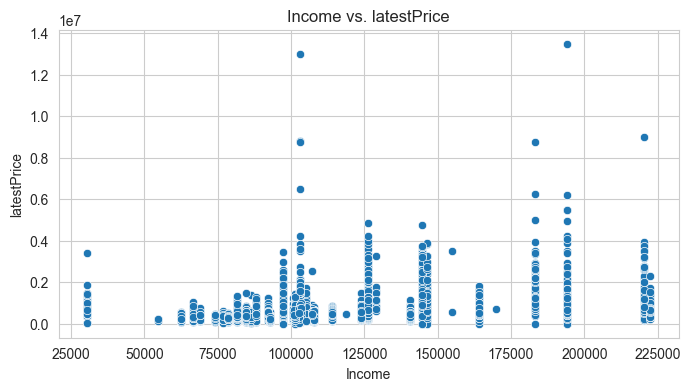

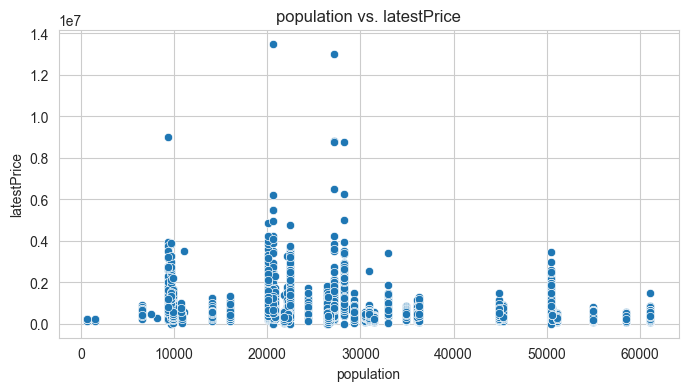

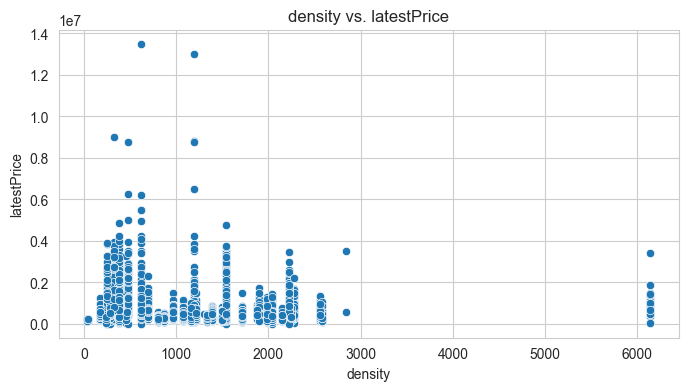

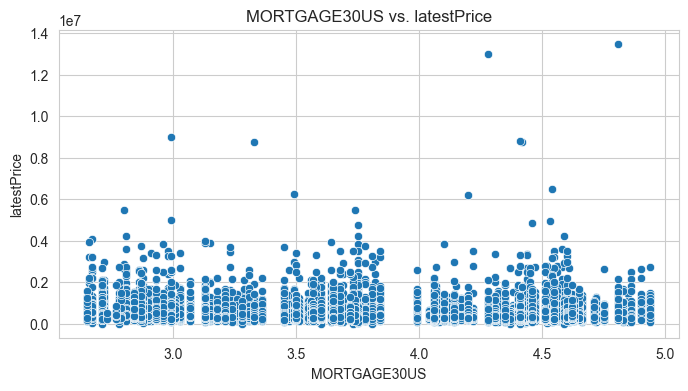

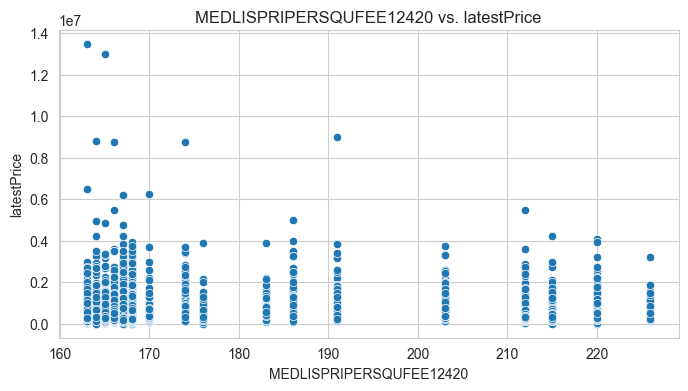

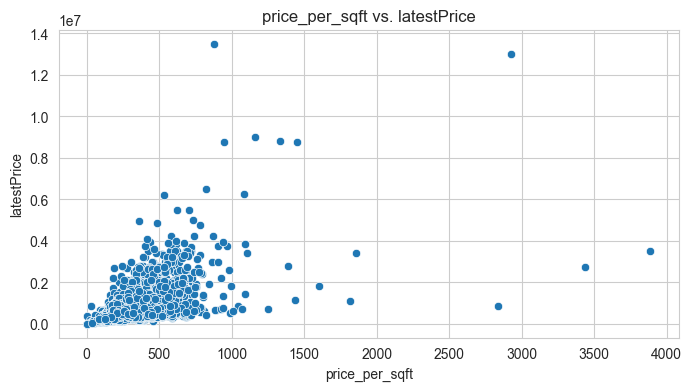

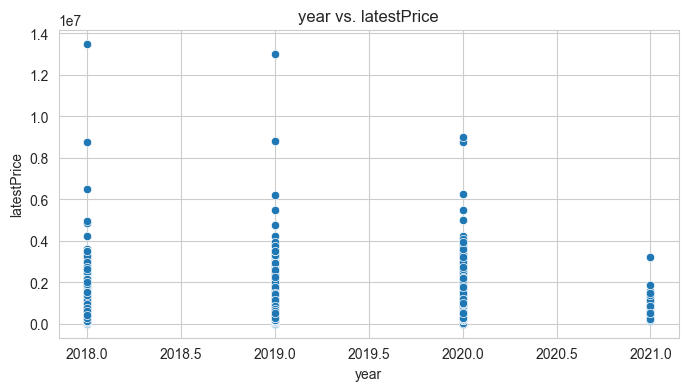

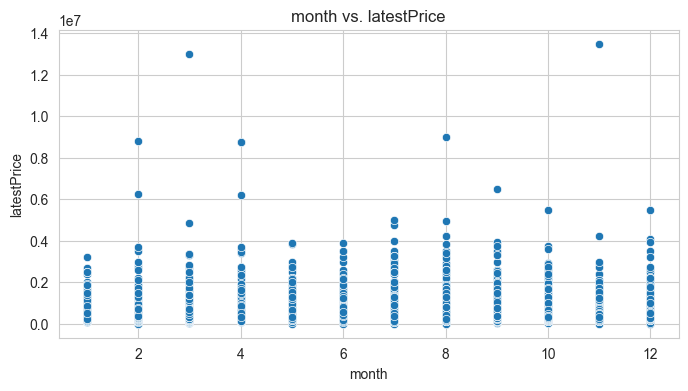

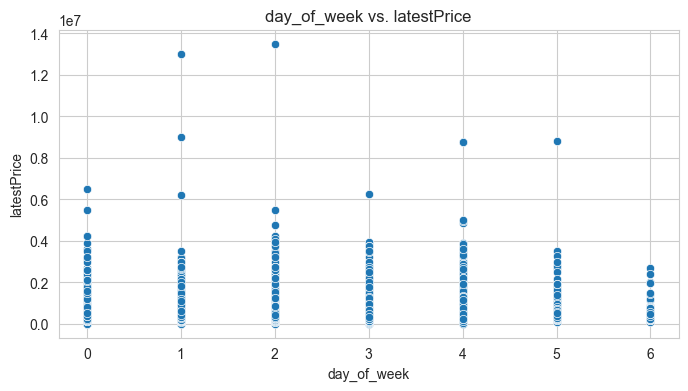

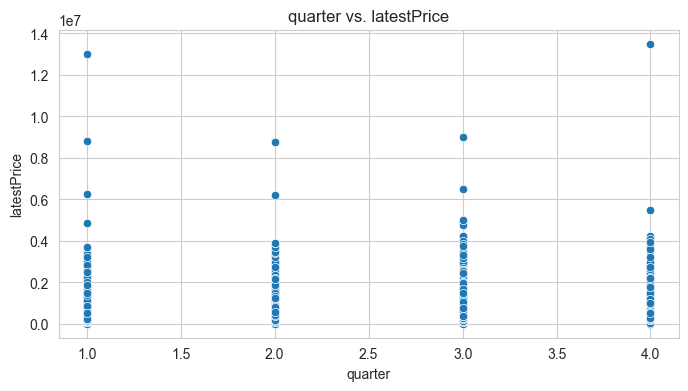

In [129]:
num_bool_df = df_map.select_dtypes(include=["number", "bool"]).drop(
    columns=["mortgage30US_lag3", "mortgage30US_lag2", "mortgage30US_lag1"],
    errors="ignore")
if "latestPrice" in num_bool_df.columns:
    num_bool_df = num_bool_df.drop(columns=["latestPrice"])

for col in num_bool_df.columns:
    if df_map[col].dtype == bool:
        continue

    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_map, x=col, y="latestPrice")
    plt.title(f"{col} vs. latestPrice")
    plt.show()

#### Mortgage rate vs Median price relation over time

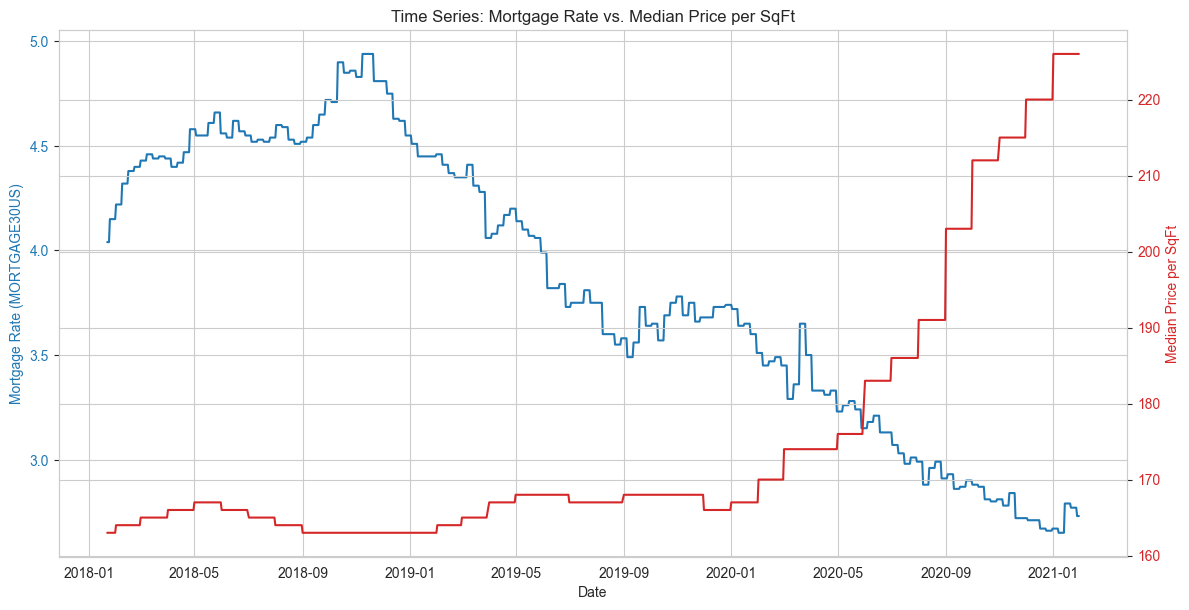

Lag Correlation (1 period lag):
                         mortgage30US_lag1  MEDLISPRIPERSQUFEE12420
mortgage30US_lag1                        1                       -1
MEDLISPRIPERSQUFEE12420                 -1                        1
Correlation with 1-period lag: -0.82
Correlation with 2-period lag: -0.82
Correlation with 3-period lag: -0.82

Correlation Pre-2020:
                         MORTGAGE30US  MEDLISPRIPERSQUFEE12420
MORTGAGE30US                        1                       -1
MEDLISPRIPERSQUFEE12420            -1                        1

Correlation 2020-2021:
                         MORTGAGE30US  MEDLISPRIPERSQUFEE12420
MORTGAGE30US                        1                       -1
MEDLISPRIPERSQUFEE12420            -1                        1


In [114]:
df_map['latest_saledate'] = pd.to_datetime(df_map['latest_saledate'])

### 1. Time Series Plots
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Mortgage Rate (MORTGAGE30US)', color=color)
ax1.plot(df_map['latest_saledate'], df_map['MORTGAGE30US'], color=color, label='Mortgage Rate')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Median Price per SqFt', color=color)
ax2.plot(df_map['latest_saledate'], df_map['MEDLISPRIPERSQUFEE12420'], color=color, label='Median Price per SqFt')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title("Time Series: Mortgage Rate vs. Median Price per SqFt")
plt.show()

### 2. Considering Lag Effects
df_map['mortgage30US_lag1'] = df_map['MORTGAGE30US'].shift(1)

# Correlation between the lagged mortgage rate and median price per sqft
lag_corr = df_map[['mortgage30US_lag1', 'MEDLISPRIPERSQUFEE12420']].corr()
print("Lag Correlation (1 period lag):")
print(lag_corr)

for lag in range(1, 4):  
    df_map[f'mortgage30US_lag{lag}'] = df_map['MORTGAGE30US'].shift(lag)
    corr = df_map[[f'mortgage30US_lag{lag}', 'MEDLISPRIPERSQUFEE12420']].corr().iloc[0,1]
    print(f"Correlation with {lag}-period lag: {corr:.2f}")

### 3. Segmenting the Dataset by Time Period before and after 2020

pre2020 = df_map[df_map['latest_saledate'] < '2020-01-01']
post2020 = df_map[(df_map['latest_saledate'] >= '2020-01-01') & (df_map['latest_saledate'] < '2022-01-01')]

corr_pre2020 = pre2020[['MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420']].corr()
corr_post2020 = post2020[['MORTGAGE30US', 'MEDLISPRIPERSQUFEE12420']].corr()

print("\nCorrelation Pre-2020:")
print(corr_pre2020)
print("\nCorrelation 2020-2021:")
print(corr_post2020)

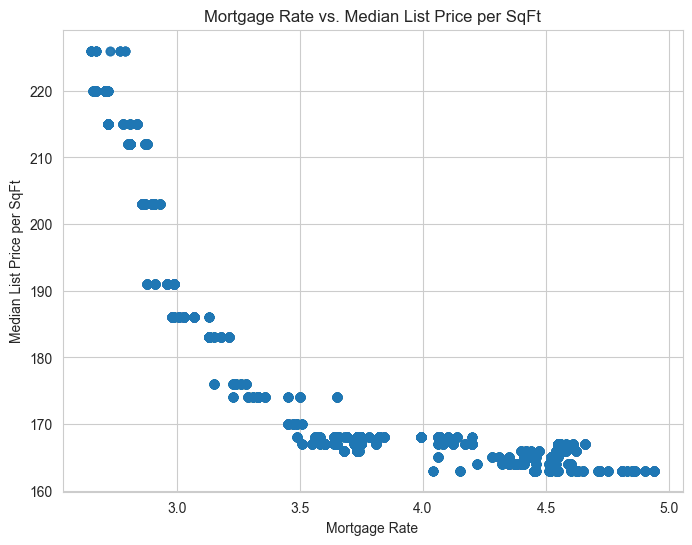

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(df_map['MORTGAGE30US'], df_map['MEDLISPRIPERSQUFEE12420'], alpha=0.5)
plt.xlabel('Mortgage Rate')
plt.ylabel('Median List Price per SqFt')
plt.title('Mortgage Rate vs. Median List Price per SqFt')
plt.show()

From 2018 to 2021, there is a clear inverse movement between the mortgage rate (blue line, left y-axis) and the median price per square foot (red line, right y-axis) <br>
As borrowing becomes cheaper (rates drop), buyer demand typically increases, contributing to higher home prices. Here, that’s reflected by the sharp climb in median price per sq ft starting around March 2020, coinciding with rates falling below 3.5%. 